In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2233, '28 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['high'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.00000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.00620
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.00620
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.00130
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.00830
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.00071
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.00294
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.00332
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,-0.00061


<IPython.core.display.Javascript object>


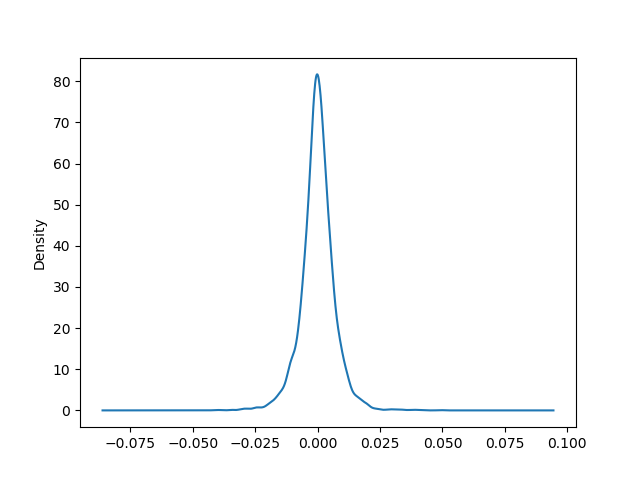

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.00000,0.00620,0.00620,0.00130,-0.00830
1,0.00620,0.00620,0.00130,-0.00830,-0.00270
2,0.00620,0.00130,-0.00830,-0.00270,0.00360
3,0.00130,-0.00830,-0.00270,0.00360,0.00290
4,-0.00830,-0.00270,0.00360,0.00290,-0.00540
...,...,...,...,...,...
5162,-0.00362,-0.00123,-0.00045,-0.00183,0.00071
5163,-0.00123,-0.00045,-0.00183,0.00071,0.00294
5164,-0.00045,-0.00183,0.00071,0.00294,0.00332
5165,-0.00183,0.00071,0.00294,0.00332,-0.00061


In [9]:
from Bayesian import *

In [11]:
robust_model = analyze_robust(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

                      mean            sd      mc_error       hpd_2.5  \
mu__0        -1.000000e+02  5.986387e-06  5.942060e-07 -1.000000e+02   
mu__1         1.000005e+02  3.421156e-06  3.401531e-07  1.000005e+02   
sigma__0      9.998415e-04  1.511465e-07  1.163263e-08  9.995260e-04   
sigma__1      9.998136e-04  1.712881e-07  1.268735e-08  9.994399e-04   
r            -2.143857e-01  1.777485e-07  1.723627e-08 -2.143861e-01   
cov__0_0      9.996831e-07  3.022108e-10  2.325928e-11  9.990523e-07   
cov__0_1     -2.143118e-07  5.036174e-11  3.836773e-12 -2.143814e-07   
cov__1_0     -2.143118e-07  5.036174e-11  3.836773e-12 -2.143814e-07   
cov__1_1      9.996272e-07  3.424699e-10  2.536733e-11  9.988801e-07   
nu_minus_one  9.999991e-01  7.774279e-07  7.725445e-08  9.999976e-01   
nu            1.999999e+00  7.774279e-07  7.725445e-08  1.999998e+00   

                  hpd_97.5  
mu__0        -1.000000e+02  
mu__1         1.000005e+02  
sigma__0      9.999996e-04  
sigma__1      9.999

<IPython.core.display.Javascript object>


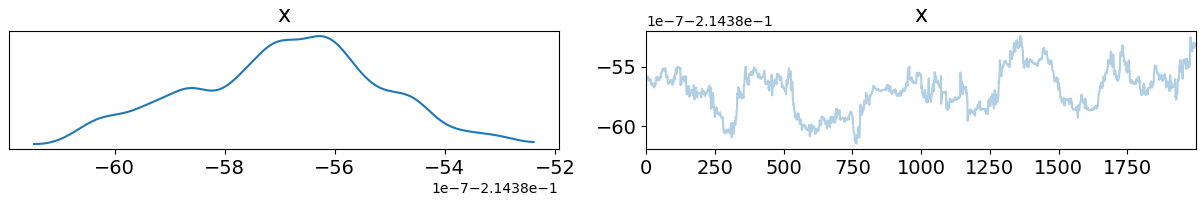

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E06A74F88>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace['r'])

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


<IPython.core.display.Javascript object>


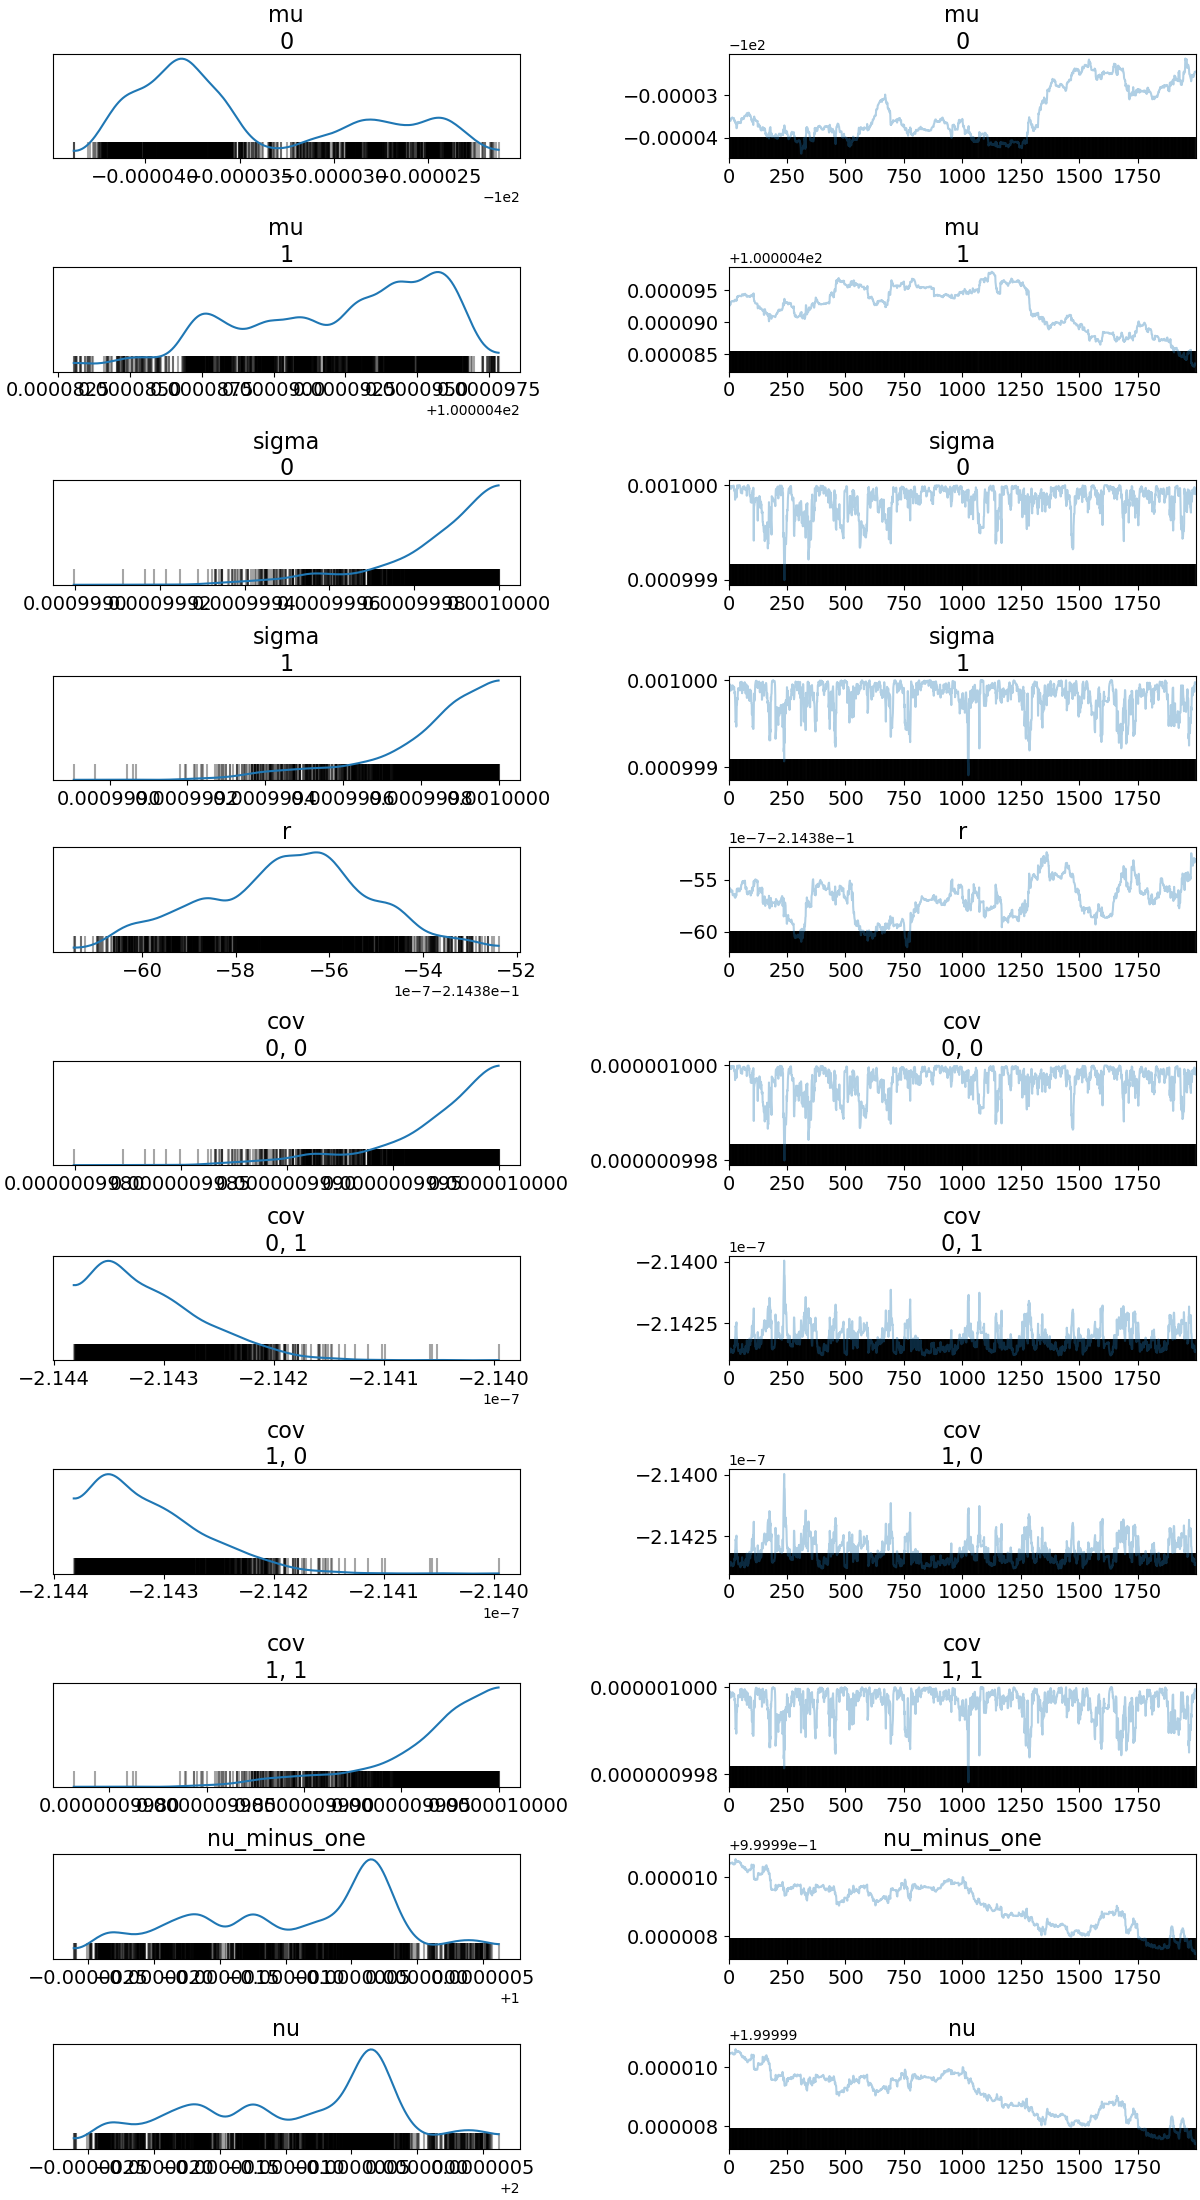

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0A143088>,
      dtype=object)

In [13]:
pm.traceplot(robust_trace)